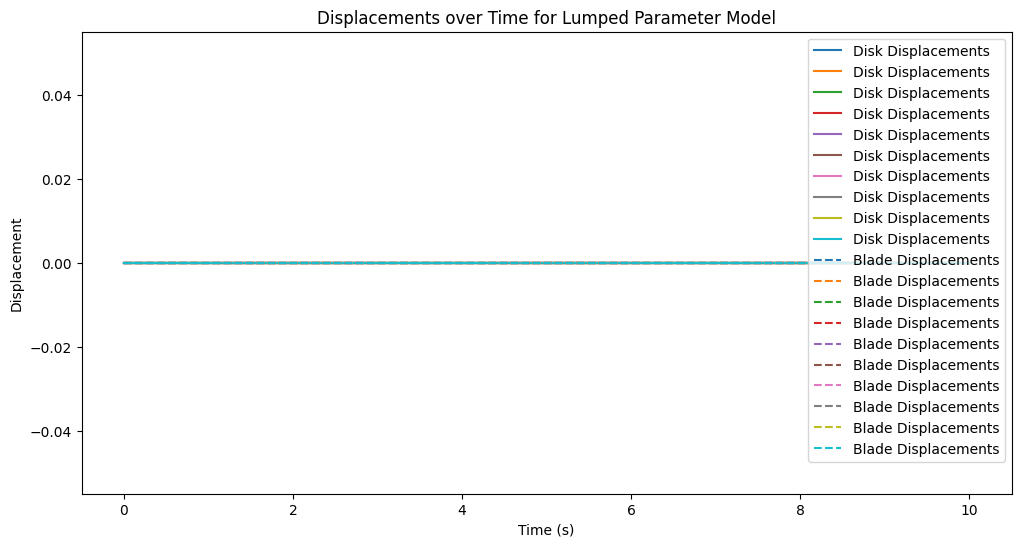

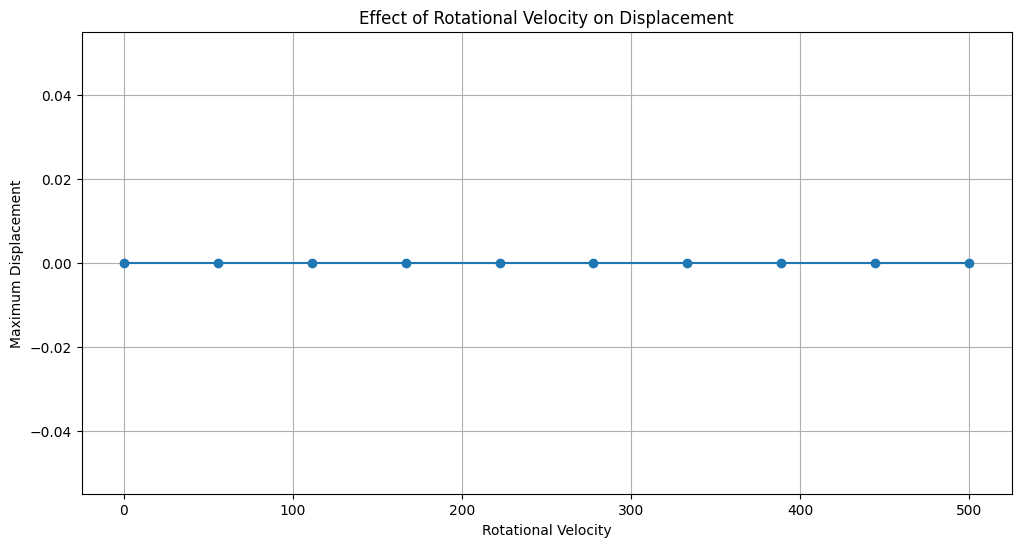

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Define system parameters
N = 10  # Number of blades
Md = 1.0  # Disk mass
mb = 0.1  # Blade mass
kd = 1000.0  # Disk stiffness
kb = 500.0  # Blade stiffness
mu = Md / mb  # Disk to blade mass ratio
kappa = kd / kb  # Stiffness ratio

def equations_of_motion(t, y, N, mu, kappa):
    """
    Equations of motion for the lumped parameter model.
    """
    x = y[:N]  # Displacements of the disk
    y_blade = y[N:2*N]  # Displacements of the blades
    dx_dt = y[2*N:3*N]  # Velocities of the disk
    dy_dt = y[3*N:]  # Velocities of the blades
    
    # Compute accelerations
    d2x_dt2 = (kappa * (np.roll(x, -1) - 2*x + np.roll(x, 1)) + (y_blade - x)) / mu
    d2y_dt2 = -(y_blade - x)
    
    return np.concatenate([dx_dt, dy_dt, d2x_dt2, d2y_dt2])

# Initial conditions
x0 = np.zeros(N)
y0 = np.zeros(N)
dx0 = np.zeros(N)
dy0 = np.zeros(N)
initial_conditions = np.concatenate([x0, y0, dx0, dy0])

# Time span for simulation
time_span = (0, 10)  # Simulate for 10 seconds

time_eval = np.linspace(0, 10, 1000)

# Solve the system
solution = solve_ivp(equations_of_motion, time_span, initial_conditions, args=(N, mu, kappa), t_eval=time_eval)

# Extract results
time = solution.t
x_sol = solution.y[:N]  # Displacements of the disk
y_sol = solution.y[N:2*N]  # Displacements of the blades

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(time, x_sol.T, label='Disk Displacements')
plt.plot(time, y_sol.T, linestyle='dashed', label='Blade Displacements')
plt.xlabel('Time (s)')
plt.ylabel('Displacement')
plt.title('Displacements over Time for Lumped Parameter Model')
plt.legend()
plt.show()

# Rotational velocity effect
omega_values = np.linspace(0, 500, 10)  # Different rotational velocities
displacement_max = []
for omega in omega_values:
    solution = solve_ivp(equations_of_motion, time_span, initial_conditions, args=(N, mu + omega * 0.001, kappa), t_eval=time_eval)
    displacement_max.append(np.max(np.abs(solution.y[:N])))

# Plot displacement vs rotational velocity
plt.figure(figsize=(12, 6))
plt.plot(omega_values, displacement_max, marker='o')
plt.xlabel('Rotational Velocity')
plt.ylabel('Maximum Displacement')
plt.title('Effect of Rotational Velocity on Displacement')
plt.grid()
plt.show()

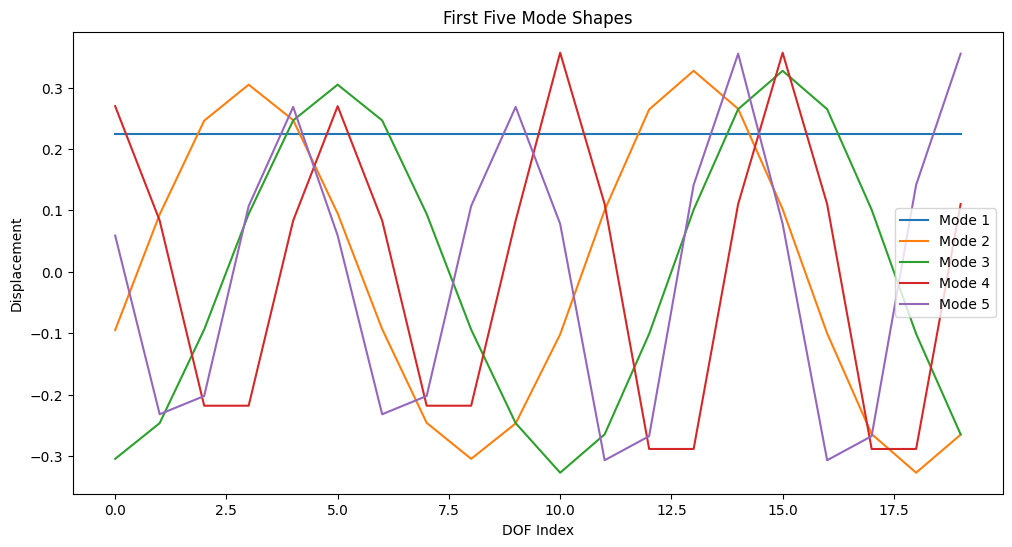

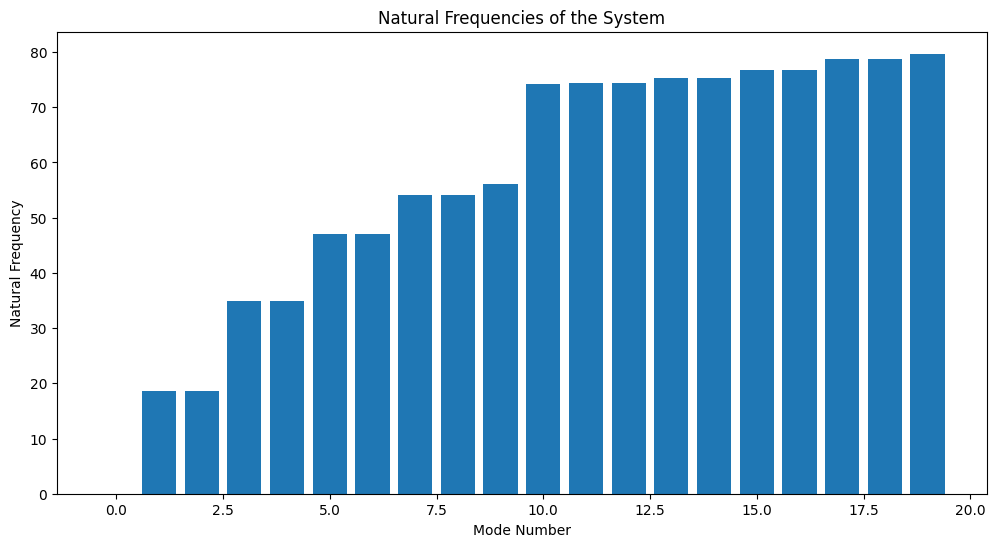

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Define system parameters
N = 10  # Number of blades
Md = 1.0  # Disk mass
mb = 0.1  # Blade mass
kd = 1000.0  # Disk stiffness
kb = 500.0  # Blade stiffness
mu = Md / mb  # Disk to blade mass ratio
kappa = kd / kb  # Stiffness ratio

# Construct mass and stiffness matrices
M = np.zeros((2*N, 2*N))
K = np.zeros((2*N, 2*N))

# Fill mass matrix
for i in range(N):
    M[i, i] = Md  # Disk masses
    M[N+i, N+i] = mb  # Blade masses

# Fill stiffness matrix
for i in range(N):
    K[i, i] += 2 * kd + kb
    K[i, (i-1) % N] -= kd
    K[i, (i+1) % N] -= kd
    K[i, N+i] -= kb
    K[N+i, i] -= kb
    K[N+i, N+i] += kb

# Solve the eigenvalue problem
eigvals, eigvecs = np.linalg.eig(np.linalg.inv(M) @ K)

# Extract natural frequencies
natural_frequencies = np.sqrt(np.abs(eigvals))

# Sort frequencies and modes
sorted_indices = np.argsort(natural_frequencies)
natural_frequencies = natural_frequencies[sorted_indices]
eigvecs = eigvecs[:, sorted_indices]

# Plot mode shapes
plt.figure(figsize=(12, 6))
for i in range(5):  # Plot first 5 mode shapes
    plt.plot(range(2*N), eigvecs[:, i], label=f'Mode {i+1}')
plt.xlabel('DOF Index')
plt.ylabel('Displacement')
plt.title('First Five Mode Shapes')
plt.legend()
plt.show()

# Plot natural frequencies
plt.figure(figsize=(12, 6))
plt.bar(range(2*N), natural_frequencies)
plt.xlabel('Mode Number')
plt.ylabel('Natural Frequency')
plt.title('Natural Frequencies of the System')
plt.show()

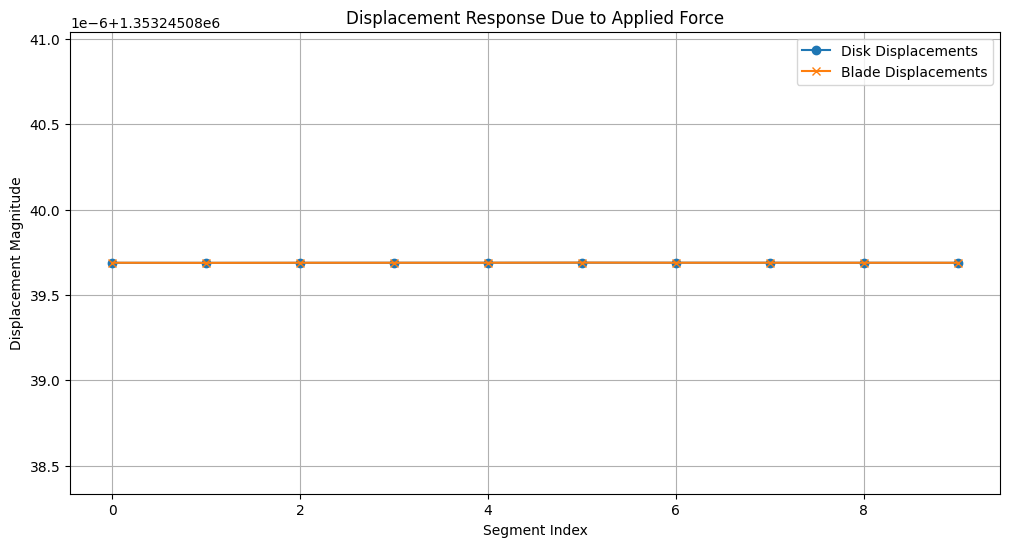

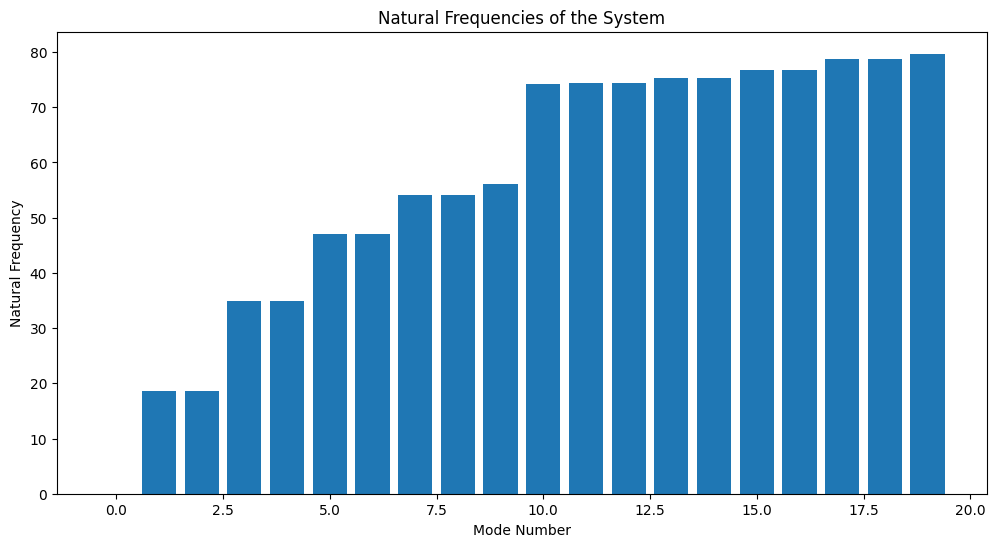

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define system parameters
N = 10  # Number of blades
Md = 1.0  # Disk mass
mb = 0.1  # Blade mass
kd = 1000.0  # Disk stiffness
kb = 500.0  # Blade stiffness
mu = Md / mb  # Disk to blade mass ratio
kappa = kd / kb  # Stiffness ratio

# Construct mass and stiffness matrices
M = np.zeros((2*N, 2*N))
K = np.zeros((2*N, 2*N))

# Fill mass matrix
for i in range(N):
    M[i, i] = Md  # Disk masses
    M[N+i, N+i] = mb  # Blade masses

# Fill stiffness matrix
for i in range(N):
    K[i, i] += 2 * kd + kb
    K[i, (i-1) % N] -= kd
    K[i, (i+1) % N] -= kd
    K[i, N+i] -= kb
    K[N+i, i] -= kb
    K[N+i, N+i] += kb

# Solve the eigenvalue problem
eigvals, eigvecs = np.linalg.eig(np.linalg.inv(M) @ K)

# Extract natural frequencies
natural_frequencies = np.sqrt(np.abs(eigvals))

# Sort frequencies and modes
sorted_indices = np.argsort(natural_frequencies)
natural_frequencies = natural_frequencies[sorted_indices]
eigvecs = eigvecs[:, sorted_indices]

# Apply a sample forcing function and compute displacements
force = np.zeros(2*N)
force[N//2] = 0 # Applying force at one blade

displacements = np.linalg.inv(K) @ force  # Static displacement response

disk_displacements = displacements[:N]
blade_displacements = displacements[N:]

# Plot static displacement results
plt.figure(figsize=(12, 6))
plt.plot(range(N), disk_displacements, label='Disk Displacements', marker='o')
plt.plot(range(N), blade_displacements, label='Blade Displacements', marker='x')
plt.xlabel('Segment Index')
plt.ylabel('Displacement Magnitude')
plt.title('Displacement Response Due to Applied Force')
plt.legend()
plt.grid()
plt.show()

# Plot natural frequencies for reference
plt.figure(figsize=(12, 6))
plt.bar(range(2*N), natural_frequencies)
plt.xlabel('Mode Number')
plt.ylabel('Natural Frequency')
plt.title('Natural Frequencies of the System')
plt.show()


PyMAPDL Result
Units       : User Defined
Version     : 20.1
Cyclic      : True
Result Sets : 26
Nodes       : 786
Elements    : 524


Available Results:
EMS : Miscellaneous summable items (normally includes face pressures)
ENF : Nodal forces
ENS : Nodal stresses
ENG : Element energies and volume
EEL : Nodal elastic strains
ETH : Nodal thermal strains (includes swelling strains)
EUL : Element euler angles
EPT : Nodal temperatures
NSL : Nodal displacements



c:\Users\ayode\AppData\Local\Programs\Python\Python313\Lib\site-packages\pyvista\jupyter\notebook.py:37: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


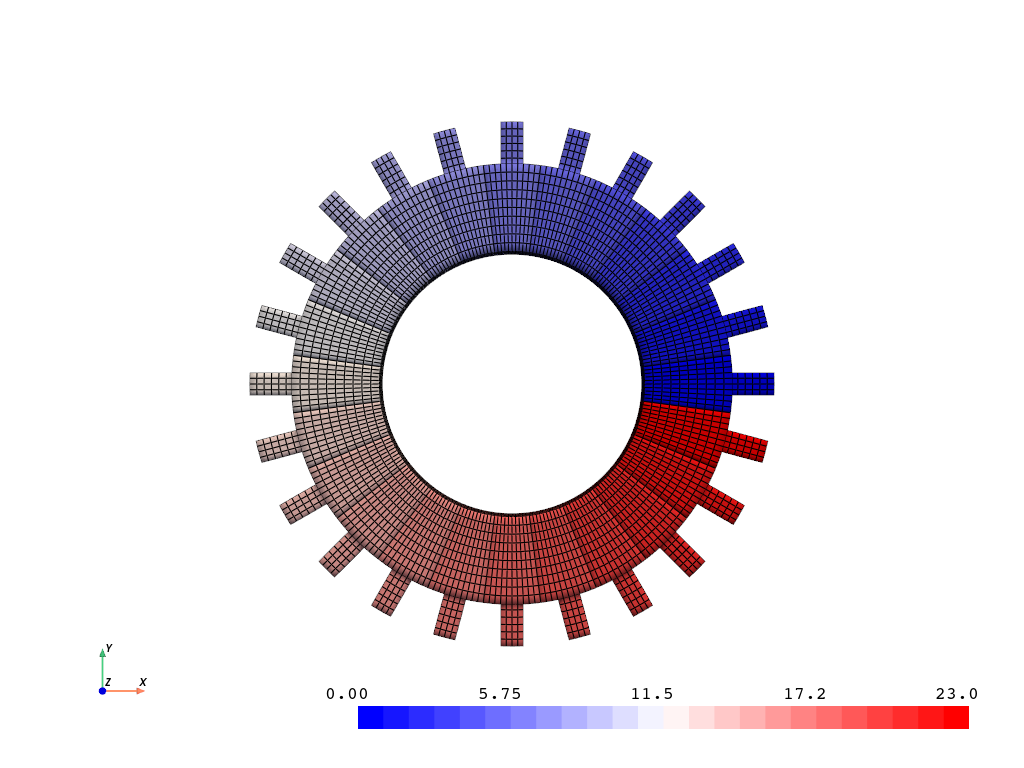

[  0   0  -1   1  -2   2   3  -3   4  -4   5  -5   6  -6   7  -7   8  -8
   9  -9  10 -10  11 -11  12  12]


c:\Users\ayode\AppData\Local\Programs\Python\Python313\Lib\site-packages\pyvista\jupyter\notebook.py:37: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


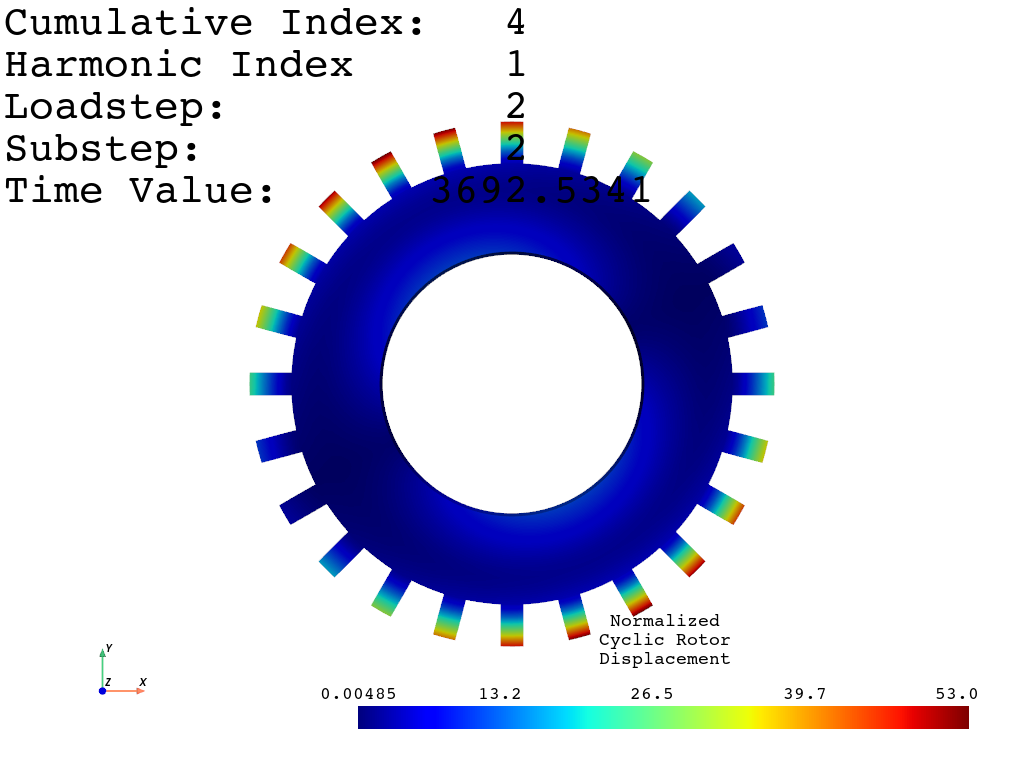

c:\Users\ayode\AppData\Local\Programs\Python\Python313\Lib\site-packages\pyvista\jupyter\notebook.py:37: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


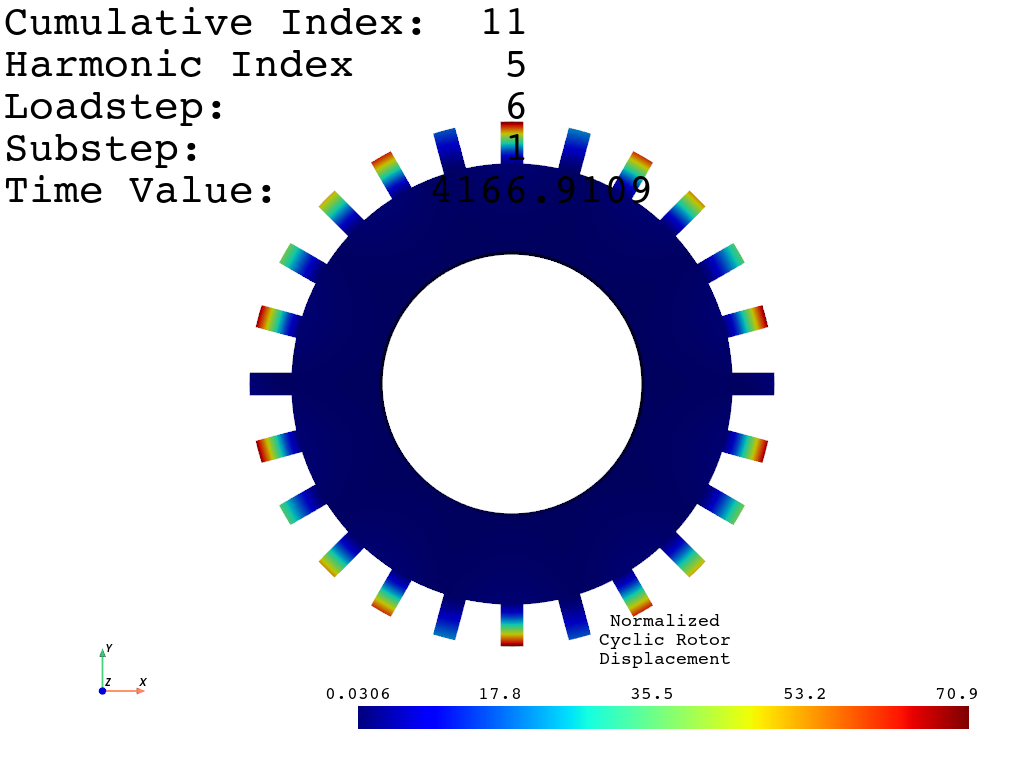

Harmonic Index: 5


c:\Users\ayode\AppData\Local\Programs\Python\Python313\Lib\site-packages\pyvista\jupyter\notebook.py:37: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


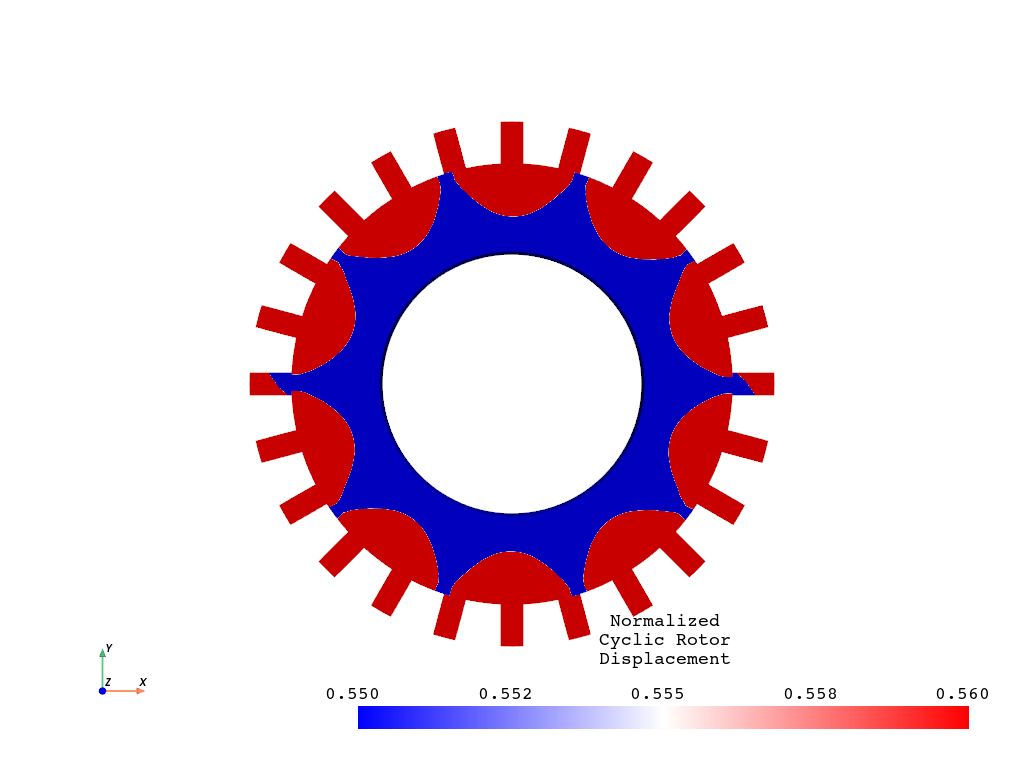

1


c:\Users\ayode\AppData\Local\Programs\Python\Python313\Lib\site-packages\pyvista\jupyter\notebook.py:37: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


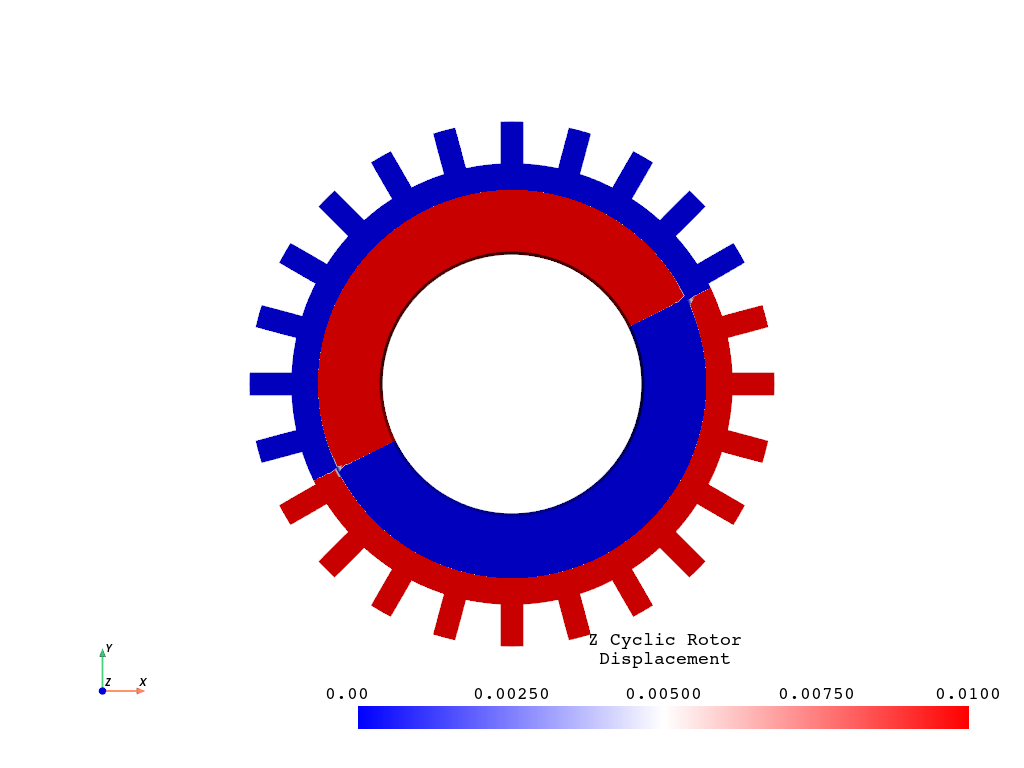

Nodal Diameters :
   1
   5
   7
  11
  13
  17
  19
  23
  25
Nodal Diameters :
   1
   5
   7
  11
 -11
  -7
  -5
  -1


c:\Users\ayode\AppData\Local\Programs\Python\Python313\Lib\site-packages\pyvista\jupyter\notebook.py:37: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


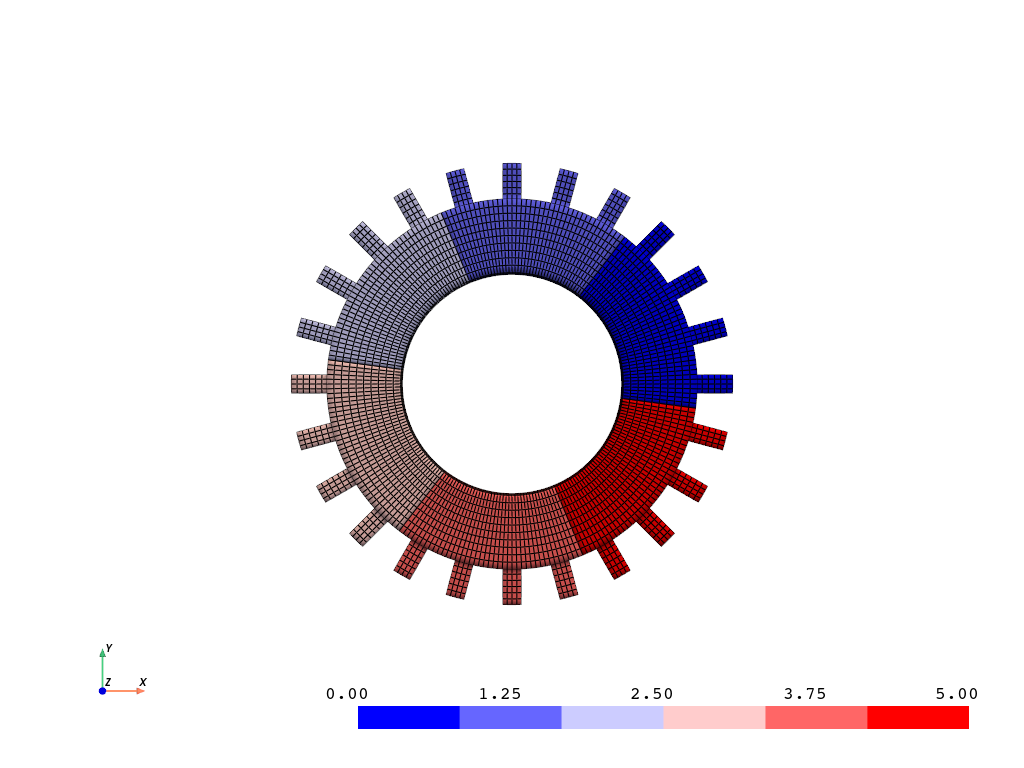

[ 0  0  0  0  0  0  0  0  1 -1  1 -1 -1  1 -1  1 -2  2 -2  2 -2  2 -2  2
  3  3  3  3  3  3  3  3]
Cumulative indices matching harmonic index 1: [ 8 10 13 15]


c:\Users\ayode\AppData\Local\Programs\Python\Python313\Lib\site-packages\pyvista\jupyter\notebook.py:37: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


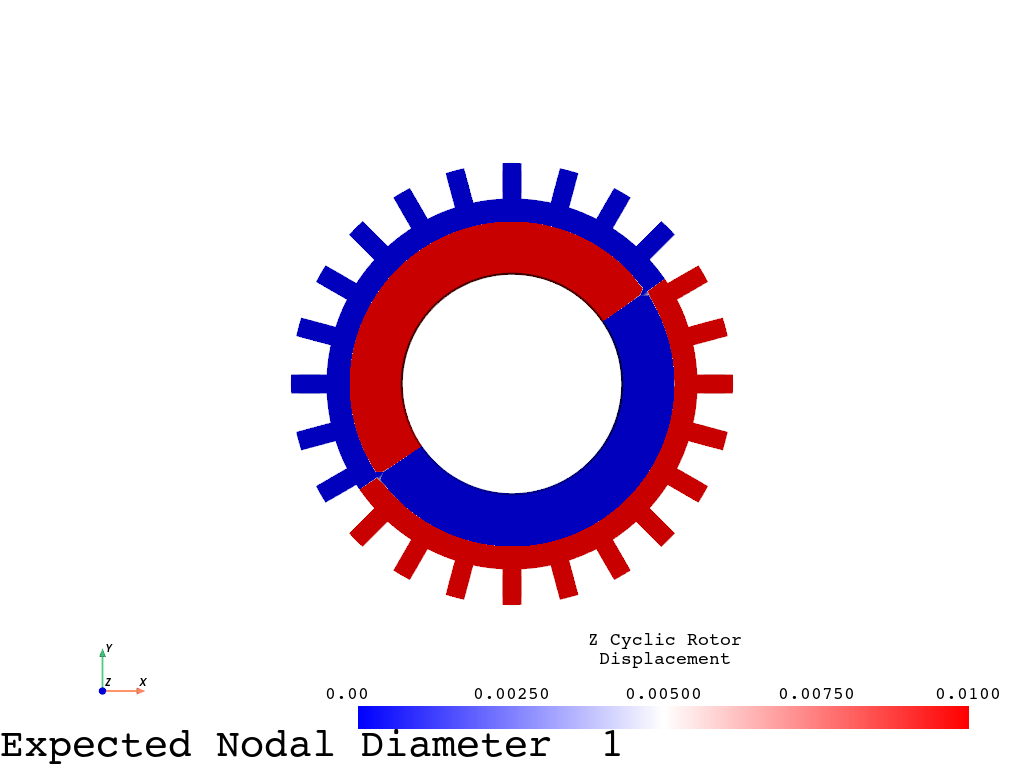

: 

In [19]:
"""
.. _ref_academic_sector:

Understanding Nodal Diameters from a Cyclic Model Analysis
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

This example shows how to interpret modes from a cyclic analysis from
MAPDL result file from both single bladed sectors as well as
multi-bladed sectors from a modal analysis.

"""

# sphinx_gallery_thumbnail_number = 2

import numpy as np

from ansys.mapdl.reader import examples

###############################################################################
# Download the academic modal analysis file
rotor = examples.download_academic_rotor_result()
print(rotor)

###############################################################################
# Rotor Sector Order
# ~~~~~~~~~~~~~~~~~~
#
# Note that the sector rotations follow the right-hand rule where the
# X-axis and Y-axis make up the horizontal plane and the Z-axis is
# vertical and positive upwards.  Rotation follows the right-hand
# rule, which looks anti-clockwise when looking downward onto the XY
# plane.
#

_ = rotor.plot_sectors(cpos="xy", smooth_shading=True, cmap="bwr")


###############################################################################
# Plot Nodal Displacement
#
# This modal analysis contains two modes for each harmonic index.
# Since this is a 24 sector rotor, it will contain the harmonic
# indices from 0 to N/2, which in this case is 12


# Print the harmonic indices with
print(rotor.harmonic_indices)

###############################################################################
# You can refer to the result set either using MAPDL's 1-based indexing
# which is (Load-step, sub-step).
_ = rotor.plot_nodal_displacement((2, 2), comp="norm", cpos="xy")

###############################################################################
# Alternatively, you can refer to the results using cumulative indexing.
_ = rotor.plot_nodal_displacement(10, comp="norm", cpos="xy")


###############################################################################
# Understanding Harmonic Indexing
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
#
# ANSYS has great documentation on harmonic indexing within their
# internal documentation, but for the sake of completeness it will be repeated here.
#
# The harmonic index used within MAPDL is an integer that determines
# the variation in the value of a single degree of freedom at points
# spaced at a circumferential angle equal to the sector angle.
#
# For this academic rotor, when the number of "blades" equals the
# number of MAPDL sectors, the harmonic index will always match the
# nodal diameter.  For example, the cumulative result 10 has a
# harmonic index of 5:

rnum = 10
print("Harmonic Index:", rotor.harmonic_indices[rnum])


# For the purpose of illustrating the nodal diameter content, we
# restrict the displacement to a narrow range and force the lower and
# upper ranges of the plot to indicate the phase of the displacement
#
# In this plot you can clearly see that the harmonic index is indeed 5
# as five, and only 5 lines can be drawn through the node lines
# spanning the circumference of the rotor.
r = 0.55
_ = rotor.plot_nodal_displacement(
    rnum,
    comp="norm",
    cpos="xy",
    rng=[r, r + 1e-2],
    add_text=False,
    cmap="bwr",
)


###############################################################################
# The same can be done for the simpler nodal diameter 1
rnum = 3
print(rotor.harmonic_indices[rnum])

r = 0
_ = rotor.plot_nodal_displacement(
    rnum,
    comp="z",
    cpos="xy",
    rng=[r, r + 1e-2],
    add_text=False,
    cmap="bwr",
)


# Therefore for this rotor with the number of sectors (N) equaling the
# number of blades, for each harmonic index there can only be one
# corresponding nodal diameter


###############################################################################
# Multi-Bladed Sectors
# ~~~~~~~~~~~~~~~~~~~~
#
# When there are multiple blades per sector as in the case of the
# following example, the relationship between the harmonic indices and
# nodal diameters becomes more complicated
#
# In this case, we use the following equation described in the MAPDL
# Cyclic Analysis Guide:
# d = m*N ± k
#
# where:
# - d is the nodal diameter
# - N is the number of sectors
# - k is the harmonic index
# - m is a set of integers from 0 to infinity
#
# Therefore, for a 6 sector rotor, the first 4 possible nodal diameters at
# harmonic index 1 are:

N = 6  # number of sectors
k = 1  # harmonic index
print("Nodal Diameters :")
for m in range(5):
    if m > 0:
        print("%4d" % (m * N - k))
    print("%4d" % (m * N + k))

###############################################################################
# Normally for a rotor where the number of blades per sector is 1,
# nodal diameters higher than N are simply aliased back to 1 and these
# solutions do not appear in the results.  However, when the sector
# contains multiple blades per sector, these results do appear in the
# analysis since they are not aliased back into a repeated mode.

# Therefore in this example part of the above modes will be
# back-aliased for a 24 blade, 6 sector rotor, and these can be
# computed with:

n_blades = 24  # 4 blades per sector
nodal_diameters = []
for m in range(5):
    if m > 0:
        nodal_diameters.append(m * N - k)
    nodal_diameters.append(m * N + k)

print("Nodal Diameters :")
for d in nodal_diameters:
    if d > n_blades:  # ignore
        continue
    elif d > n_blades // 2:  # back alias
        print("%4d" % -(n_blades - d))
    else:
        print("%4d" % d)


###############################################################################
# Plot the Multi-Bladed Sector
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~
#
# We can verify these results by analyzing a multi-sector rotor

multi_blade_rotor = examples.download_academic_rotor_4blade_result()

# plot all the sectors
_ = multi_blade_rotor.plot_sectors(
    cpos="xy", smooth_shading=True, cmap="bwr"
)

###############################################################################
# We can then see that the harmonic indices for harmonic index 1
# indeed alias back to the expected nodal diameters in the following
# plots.
print(multi_blade_rotor.harmonic_indices)

hi_1 = np.nonzero(multi_blade_rotor.harmonic_indices == 1)[0]
print("Cumulative indices matching harmonic index 1:", hi_1)

###############################################################################
# Cumulative result 8 and harmonic index 1
rnum = 8
text = "Expected Nodal Diameter %2d" % nodal_diameters[0]
_ = multi_blade_rotor.plot_nodal_displacement(
    rnum, comp="z", cpos="xy", rng=[r, r + 1e-2], add_text=text, cmap="bwr"
)


###############################################################################
# Cumulative result 10 and harmonic index 5
rnum = 10
text = "Expected Nodal Diameter %2d" % nodal_diameters[1]
_ = multi_blade_rotor.plot_nodal_displacement(
    rnum, comp="z", cpos="xy", rng=[r, r + 1e-2], add_text=text, cmap="bwr"
)


###############################################################################
# Cumulative result 13 and harmonic index 7
rnum = 13
text = "Expected Nodal Diameter %2d" % nodal_diameters[2]
_ = multi_blade_rotor.plot_nodal_displacement(
    rnum, comp="z", cpos="xy", rng=[r, r + 1e-2], add_text=text, cmap="bwr"
)


###############################################################################
# Cumulative result 15 and harmonic index 11
rnum = 15
text = "Expected Nodal Diameter %2d" % nodal_diameters[3]
_ = multi_blade_rotor.plot_nodal_displacement(
    rnum, comp="z", cpos="xy", rng=[r, r + 1e-2], add_text=text, cmap="bwr"
)


###############################################################################
# Traveling Wave Animation
# ~~~~~~~~~~~~~~~~~~~~~~~~
# You can animate the traveling wave for a cyclic result using
# ``animate_nodal_displacement``.  For a modal result, be sure to
# modify ``displacement_factor`` to a value that properly scales the
# modal solution.  Recall that solutions to a modal analysis from
# MAPDL may or may not be scaled to unity or the mass matrix depending
# on the settings within the modal analysis.
#
# Set ``loop=True`` to allow for a continuous plot, and modify
# ``n_frames`` to allow for a smoother or faster plot.  See
# ``help(pyvista.plot)`` for additional keyword arguments.
#
_ = rotor.animate_nodal_displacement(
    (3, 1),
    displacement_factor=0.03,
    n_frames=30,
    show_axes=False,
    background="w",
    loop=False,
    add_text=False,
    movie_filename="EO3_Mode1.gif",
)


###############################################################################
# Note how you can plot the backwards traveling wave by selecting the
# second mode in the mode pair ``(3, 2)`` instead of ``(3, 1)``.
#
_ = rotor.animate_nodal_displacement(
    (3, 2),
    displacement_factor=0.03,
    n_frames=30,
    show_axes=False,
    background="w",
    loop=False,
    add_text=False,
    movie_filename="EO3_Mode1.gif",
)
